data needs to be stationaryto use SARIMA
https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/


Stationarity refers to the statistical properties of a time series remaining constant over time, such as constant mean, constant variance, and constant autocovariance. You can use the Dickey-Fuller test for this.

Perform the ADF Test: Inside the function, it calls the adfuller function on the timeseries. The autolag=’AIC’ parameter specifies that the lag order should be chosen based on the Akaike Information Criterion (AIC).
Retrieve the p-Value: It extracts the p-value from the ADF test result, which is stored in the variable p_value.
Print the Results: It prints the ADF Statistic (result[0]), the p-value (p_value), and a statement indicating whether the time series is stationary or non-stationary based on the p-value. If the p-value is less than 0.05, it considers the series as “Stationary”; otherwise, it’s labeled as “Non-Stationary.”

In [4]:
# !pip install statsmodels tqdm

In [5]:
   
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import tqdm




In [6]:
df=pd.read_csv(r"C:\Users\Madnessity\Desktop\FINAL_112504_teva_sales_small_diff_pacf_lags.csv") 
df


,month,ar_lag_1,ar_lag_2,morion_20731_diff_1,morion_71569_diff_1,morion_71570_diff_1,morion_74821_diff_1,morion_75666_diff_1,morion_80191_diff_1,morion_115212_diff_1,...,atc_code_5_normalized,brand_normalized,inn_normalized,nfc_1_normalized,strength_unit_normalized,drug_size_unit_normalized,form_normalized,strength_amount_normalized,pack_size_normalized,drug_size_amount_normalized
0,2019-05-01,1509.358400,3669.348000,-5.656768,10.652480,-25.328144,-223.561984,80.206640,-106.550912,-738.920816,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
1,2019-06-01,2880.038720,1509.358400,115.968586,-30.390016,2648.281485,-201.737587,165.907312,-261.008730,-671.648653,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
2,2019-07-01,-3658.435024,2880.038720,1032.316868,257.349987,2761.989188,-166.630070,2089.245850,-216.914984,-807.426922,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
3,2019-08-01,1151.445981,-3658.435024,1691.249495,569.879990,361.233350,-143.446056,4743.836680,-160.153987,-440.153538,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
4,2019-09-01,-768.921215,1151.445981,535.671596,624.993992,261.794680,-77.226845,3637.661344,2.138810,-511.430830,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
5,2019-10-01,-1482.214972,-768.921215,105.297277,51.069193,-1896.230256,-83.079476,1439.301075,336.453048,-371.530664,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
6,2019-11-01,2539.814022,-1482.214972,-228.878179,-58.894645,-426.580205,-58.845581,544.810860,252.448439,-380.988531,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
7,2019-12-01,817.843218,2539.814022,-101.160543,-69.701716,-156.850164,7627.347536,1172.852688,19.944751,-347.038825,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
8,2020-01-01,475.294574,817.843218,-186.790434,-66.069373,284.553869,5594.408028,1041.178150,-51.436199,-31.125060,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
9,2020-02-01,-2860.472341,475.294574,-507.192347,31.544502,-183.724905,5636.230423,-14.819480,-51.068959,-359.950048,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0


In [7]:
# df = df.rename(columns={'Month':'Month', 'Sales_diff':'Sales'})

sales_data=df.copy()
type(sales_data)

pandas.core.frame.DataFrame

In [8]:
sales_data['month']=pd.to_datetime(sales_data['month']) 
type(sales_data)


pandas.core.frame.DataFrame

In [9]:
monthly_sales = sales_data
monthly_sales.head()


,month,ar_lag_1,ar_lag_2,morion_20731_diff_1,morion_71569_diff_1,morion_71570_diff_1,morion_74821_diff_1,morion_75666_diff_1,morion_80191_diff_1,morion_115212_diff_1,...,atc_code_5_normalized,brand_normalized,inn_normalized,nfc_1_normalized,strength_unit_normalized,drug_size_unit_normalized,form_normalized,strength_amount_normalized,pack_size_normalized,drug_size_amount_normalized
0,2019-05-01,1509.358400,3669.348000,-5.656768,10.652480,-25.328144,-223.561984,80.206640,-106.550912,-738.920816,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
1,2019-06-01,2880.038720,1509.358400,115.968586,-30.390016,2648.281485,-201.737587,165.907312,-261.008730,-671.648653,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
2,2019-07-01,-3658.435024,2880.038720,1032.316868,257.349987,2761.989188,-166.630070,2089.245850,-216.914984,-807.426922,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
3,2019-08-01,1151.445981,-3658.435024,1691.249495,569.879990,361.233350,-143.446056,4743.836680,-160.153987,-440.153538,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0
4,2019-09-01,-768.921215,1151.445981,535.671596,624.993992,261.794680,-77.226845,3637.661344,2.138810,-511.430830,...,0.111111,0.366972,0.315789,0.375,0.4,1,1,0.0025,0.243697,0


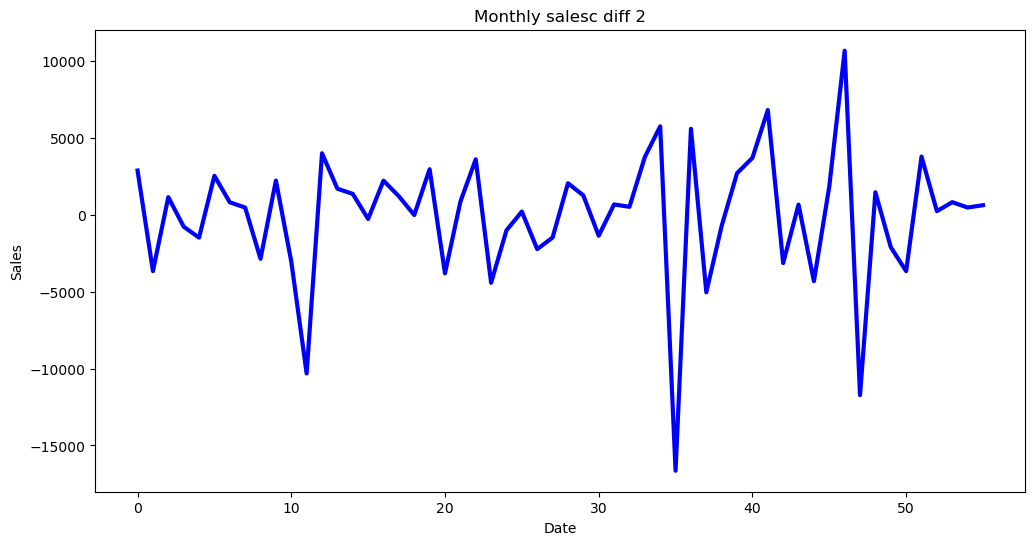

In [10]:
plt.figure(figsize=(12, 6)) 
plt.plot(monthly_sales['morion_112504_diff_2'], linewidth=3,c='blue') 
plt.title("Monthly salesc diff 2") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.show()

Step 7: Identify Model Parameters
Identify the SARIMA model parameters (p, d, q, P, D, Q, s) using ACF and PACF plots.

ACF Plot: This function generates an ACF plot, which is a plot of autocorrelations of the differenced time series. Autocorrelation measures the relationship between a data point and previous data points at different lags.
PACF Plot: This function generates a PACF plot, which is a plot of partial autocorrelations of the differenced time series. Partial autocorrelation represents the correlation between a data point and a lag while adjusting for the influence of other lags.

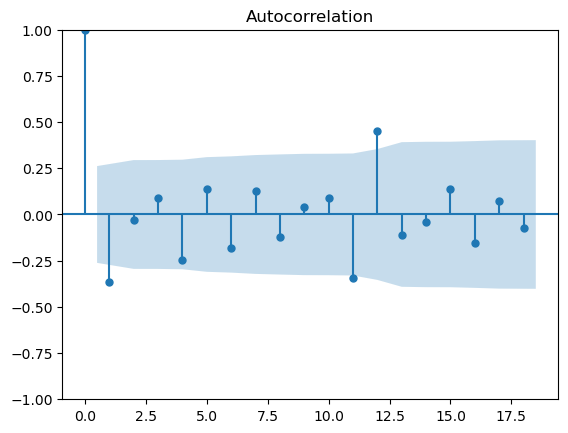

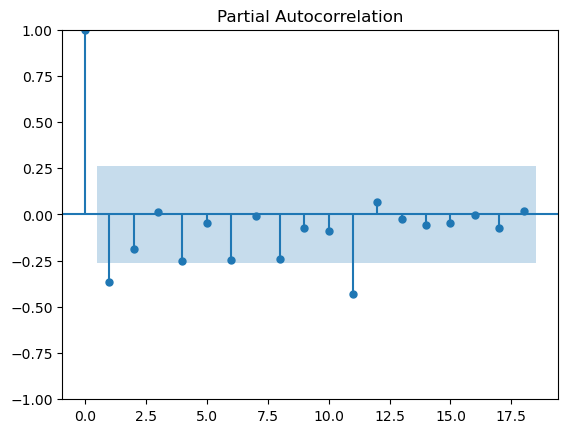

In [12]:
# Plot ACF and PACF 
plot_acf(monthly_sales['morion_112504_diff_2']) 
plot_pacf(monthly_sales['morion_112504_diff_2']) 
plt.show()

Here's a general guideline on how to use ACF and PACF for SARIMA models:

Autocorrelation Function (ACF):

MA (Moving Average) Component: The ACF is used to identify the order of the moving average (MA) component in the model. Significant spikes in the ACF at lag 
𝑞
q suggest an MA(q) model.
Seasonal MA (SMA) Component: For the seasonal MA component, look at the ACF at the seasonal lags (e.g., if seasonality is 12 months, check lags 12, 24, 36, etc.).
Partial Autocorrelation Function (PACF):

AR (Autoregressive) Component: The PACF is used to identify the order of the autoregressive (AR) component. Significant spikes in the PACF at lag 
𝑝
p suggest an AR(p) model.
Seasonal AR (SAR) Component: For the seasonal AR component, look at the PACF at the seasonal lags.

In [14]:
# def check_stationarity(timeseries): 
#     # Perform the Dickey-Fuller test 
#     # result = adfuller(timeseries, autolag='AIC') 
#     result = adfuller(timeseries)
#     p_value = result[1] 
#     print(f'ADF Statistic: {result[0]}') 
#     print(f'p-value: {p_value}') 
#     print('Stationary' if p_value < 0.05 else 'Non-Stationary') 
  
  
# check_stationarity(monthly_sales['Sales'])

 If the correlation coefficient at a certain lag is outside the confidence interval, it means that the correlation coefficient is statistically significant and not due to chance.

For example, p is the autoregressive (AR) order, d is the differencing order, and s is the seasonality (in this case, 12 for monthly seasonality).

Split the set

In [18]:
type(monthly_sales)
monthly_sales.columns

Index(['month', 'ar_lag_1', 'ar_lag_2', 'morion_20731_diff_1',
       'morion_71569_diff_1', 'morion_71570_diff_1', 'morion_74821_diff_1',
       'morion_75666_diff_1', 'morion_80191_diff_1', 'morion_115212_diff_1',
       'morion_115213_diff_1', 'morion_141381_diff_1', 'morion_160194_diff_1',
       'morion_160195_diff_1', 'morion_289655_diff_1', 'morion_289658_diff_1',
       'morion_305988_diff_1', 'morion_305993_diff_1', 'morion_305998_diff_1',
       'morion_328378_diff_1', 'morion_378563_diff_1', 'morion_378565_diff_1',
       'morion_444532_diff_1', 'morion_444535_diff_1', 'morion_614194_diff_1',
       'morion_112504_diff_2', 'morion_112504_diff_2_MA_3',
       'morion_112504_diff_2_CMA', 'atc_code_5_normalized', 'brand_normalized',
       'inn_normalized', 'nfc_1_normalized', 'strength_unit_normalized',
       'drug_size_unit_normalized', 'form_normalized',
       'strength_amount_normalized', 'pack_size_normalized',
       'drug_size_amount_normalized'],
      dtype='object')

In [19]:
 # # Apply your filtering code
monthly_sales_train = monthly_sales[:-12]
monthly_sales_test = monthly_sales[-12:]

exog_vars = ['ar_lag_1', 'ar_lag_2', 'morion_20731_diff_1',
       'morion_71569_diff_1', 'morion_71570_diff_1', 'morion_74821_diff_1',
       'morion_75666_diff_1', 'morion_80191_diff_1', 'morion_115212_diff_1',
       'morion_115213_diff_1', 'morion_141381_diff_1', 'morion_160194_diff_1',
       'morion_160195_diff_1', 'morion_289655_diff_1', 'morion_289658_diff_1',
       'morion_305988_diff_1', 'morion_305993_diff_1', 'morion_305998_diff_1',
       'morion_328378_diff_1', 'morion_378563_diff_1', 'morion_378565_diff_1',
       'morion_444532_diff_1', 'morion_444535_diff_1', 'morion_614194_diff_1',
       'morion_112504_diff_2_MA_3', 'morion_112504_diff_2_CMA', 'atc_code_5_normalized', 'brand_normalized',
       'inn_normalized', 'nfc_1_normalized', 'strength_unit_normalized',
       'drug_size_unit_normalized', 'form_normalized',
       'strength_amount_normalized', 'pack_size_normalized',
       'drug_size_amount_normalized']

# Select exogenous variables for training set
exog_train = monthly_sales_train[exog_vars]

future_exog = monthly_sales_test[exog_vars]

In [20]:
print(monthly_sales_train.dtypes)


month                          datetime64[ns]
ar_lag_1                              float64
ar_lag_2                              float64
morion_20731_diff_1                   float64
morion_71569_diff_1                   float64
morion_71570_diff_1                   float64
morion_74821_diff_1                   float64
morion_75666_diff_1                   float64
morion_80191_diff_1                   float64
morion_115212_diff_1                  float64
morion_115213_diff_1                  float64
morion_141381_diff_1                  float64
morion_160194_diff_1                  float64
morion_160195_diff_1                  float64
morion_289655_diff_1                  float64
morion_289658_diff_1                  float64
morion_305988_diff_1                  float64
morion_305993_diff_1                  float64
morion_305998_diff_1                  float64
morion_328378_diff_1                  float64
morion_378563_diff_1                  float64
morion_378565_diff_1              

In [21]:
# Define SARIMA parameters 
 
p, d, q = 3, 0, 3
P, D, Q, s = 0, 1, 1, 12  # Assuming monthly seasonality 

# Fit the SARIMA model 
model = SARIMAX(
    monthly_sales_train['morion_112504_diff_2'], order=(p, d, q), seasonal_order=(P, D, Q, s),
    exog=exog_train) 
results = model.fit(maxiter=1000) 
model 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In this section of the code, we are using the SARIMA model to forecast future sales values. We specify that we want to forecast the next 12 months by setting forecast_periods to 12.

The results.get_forecast(steps=forecast_periods) function generates the forecast, providing both the predicted mean and a confidence interval for the forecasted values.

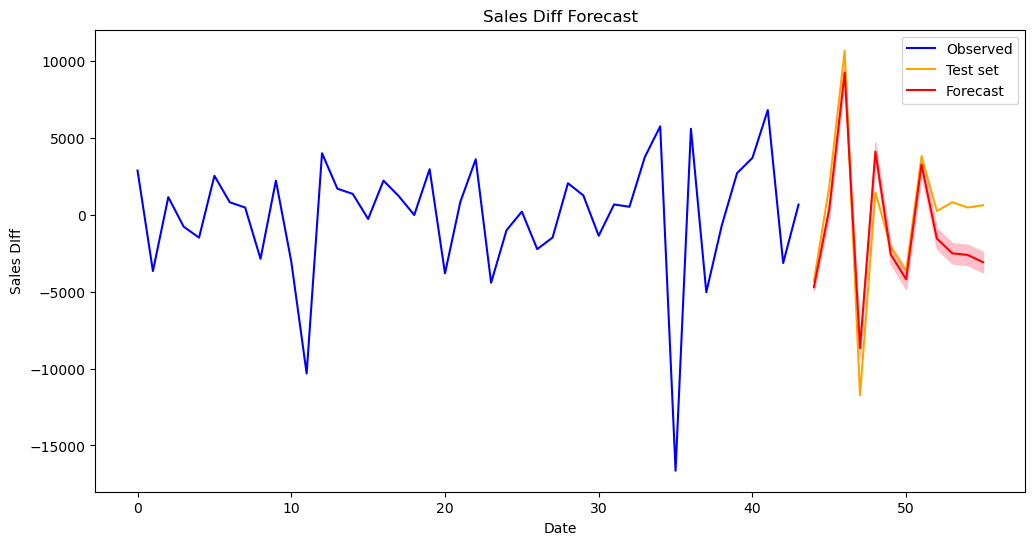

In [24]:
# Forecast future values 
forecast_periods = 12  # Forecast the next 12 months 
forecast = results.get_forecast(steps=forecast_periods, exog=future_exog) 
forecast_mean = forecast.predicted_mean 
forecast_ci = forecast.conf_int() 
  
# Plot the forecast 
plt.figure(figsize=(12, 6)) 
plt.plot(monthly_sales_train['morion_112504_diff_2'], label='Observed', color='blue') 
plt.plot(monthly_sales_test['morion_112504_diff_2'], label='Test set', color='orange') 
plt.plot(forecast_mean, label='Forecast', color='red') 
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink') 
plt.title("Sales Diff Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales DIff") 
plt.legend() 
plt.show()

Step 10: Evaluate the Model
Let’s evaluate the forecasted sales values by comparing them to the observed sales data using two common metrics for this evaluation: Mean Absolute Error (MAE) and Mean Squared Error (MSE).

MAE (Mean Absolute Error) measures the average absolute difference between the observed and forecasted values. It provides a simple and easily interpretable measure of the model’s accuracy.
MSE (Mean Squared Error) measures the average of the squared differences between the observed and forecasted values. MSE gives more weight to large errors and is sensitive to outliers.
Lower values indicate better performance.

In [26]:
forecast

In [27]:
observed = monthly_sales['morion_112504_diff_2'][-forecast_periods:] 
mae = mean_absolute_error(observed, forecast_mean) 
mse = mean_squared_error(observed, forecast_mean) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

MAE: 1866.760633483416
MSE: 4911954.5252183685


We need MAPE or another model to compare the rest of the data 

In [29]:
# Calculate MAPE
observed = monthly_sales['morion_112504_diff_2'][-forecast_periods:]
mape = mean_absolute_percentage_error(observed, forecast_mean)
mape

2.2798736201893752

### Train again on 5 years and forecast 1 year 


In [72]:
# Fit the SARIMA model 
model_2 = SARIMAX(
    monthly_sales['morion_112504_diff_2'], order=(p, d, q), seasonal_order=(P, D, Q, s),
    exog=monthly_sales[exog_vars]) 
results = model_2.fit(maxiter=1000) 
model 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


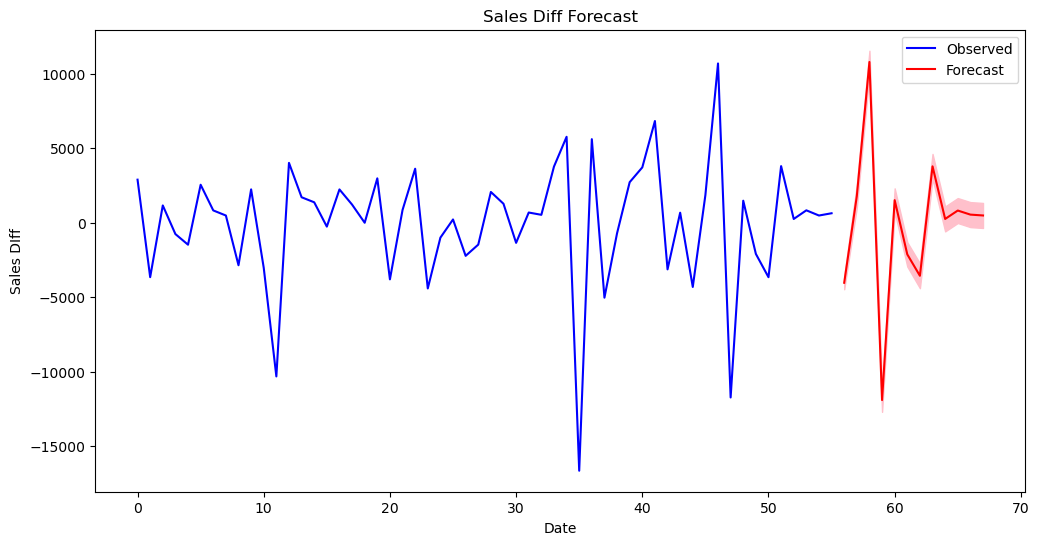

In [73]:
# Forecast future values 
forecast_periods = 12  # Forecast the next 12 months 
forecast = results.get_forecast(steps=forecast_periods, exog=future_exog) 
forecast_mean = forecast.predicted_mean 
forecast_ci = forecast.conf_int() 
  
# Plot the forecast 
plt.figure(figsize=(12, 6)) 
plt.plot(monthly_sales['morion_112504_diff_2'], label='Observed', color='blue') 

plt.plot(forecast_mean, label='Forecast', color='red') 
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink') 
plt.title("Sales Diff Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales DIff") 
plt.legend() 
plt.show()

In [75]:
# Create a dataframe for the forecast
forecast_df_2 = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower CI': forecast_ci.iloc[:, 0],
    'Upper CI': forecast_ci.iloc[:, 1]
})
# forecast_df_2.index.name = 'Date'

In [76]:
forecast_df_2.reset_index()


,index,Forecast,Lower CI,Upper CI
0,56,-4034.871852,-4472.653215,-3597.090488
1,57,1781.105394,1027.774914,2534.435874
2,58,10774.489553,10019.372353,11529.606753
3,59,-11902.522078,-12695.841225,-11109.202931
4,60,1505.876787,713.924902,2297.828673
5,61,-2131.109145,-2945.828316,-1316.389974
6,62,-3566.587641,-4398.771756,-2734.403526
7,63,3774.821145,2942.628605,4607.013685
8,64,245.955372,-590.339274,1082.250019
9,65,809.687942,-26.488392,1645.864277


In [81]:
forecast_df_2['Forecast_Sales'] = np.nan

In [83]:
# forecast_df_2.reset_index()
forecast_df_2
# forecast_df_2 = forecast_df_2.drop('Date', axis=1)
# forecast_df_2['Date'] =  pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')
# forecast_df_2 = forecast_df_2.rename(columns={})

,Forecast,Lower CI,Upper CI,Forecast_Sales
56,-4034.871852,-4472.653215,-3597.090488,NaN
57,1781.105394,1027.774914,2534.435874,NaN
58,10774.489553,10019.372353,11529.606753,NaN
59,-11902.522078,-12695.841225,-11109.202931,NaN
60,1505.876787,713.924902,2297.828673,NaN
61,-2131.109145,-2945.828316,-1316.389974,NaN
62,-3566.587641,-4398.771756,-2734.403526,NaN
63,3774.821145,2942.628605,4607.013685,NaN
64,245.955372,-590.339274,1082.250019,NaN
65,809.687942,-26.488392,1645.864277,NaN


In [85]:
sales_actuals = pd.read_excel(r"C:\Users\Madnessity\Desktop\SM_SALES.xlsx")
sales_actuals[sales_actuals['morion_id'] == 112504]['sm_sales'][-2:]
sales_for_last_two_months = list(sales_actuals[sales_actuals['morion_id'] == 112504]['sm_sales'][-2:])
sales_for_last_two_months



[185025.3122126712, 187494.621770137]

In [87]:
forecast_df_2.loc[56, 'Forecast_Sales'] = 2 * sales_for_last_two_months[1] - sales_for_last_two_months[0] + forecast_df_2.loc[56, 'Forecast']
forecast_df_2.loc[57, 'Forecast_Sales'] = 2 * forecast_df_2.loc[56, 'Forecast_Sales'] - sales_for_last_two_months[1] + forecast_df_2.loc[57, 'Forecast']

In [89]:
forecast_df_2

,Forecast,Lower CI,Upper CI,Forecast_Sales
56,-4034.871852,-4472.653215,-3597.090488,185929.059476
57,1781.105394,1027.774914,2534.435874,186144.602575
58,10774.489553,10019.372353,11529.606753,NaN
59,-11902.522078,-12695.841225,-11109.202931,NaN
60,1505.876787,713.924902,2297.828673,NaN
61,-2131.109145,-2945.828316,-1316.389974,NaN
62,-3566.587641,-4398.771756,-2734.403526,NaN
63,3774.821145,2942.628605,4607.013685,NaN
64,245.955372,-590.339274,1082.250019,NaN
65,809.687942,-26.488392,1645.864277,NaN


In [97]:

# Iterating through the DataFrame with index
for index, value in forecast_df_2['Forecast_Sales'].iloc[2:].items():
    print(f'Row {index} : {value}')
    if index in [56, 57]:
        print(index, 'skip')
    else:
        forecast_df_2.loc[index, 'Forecast_Sales'] = 2 * forecast_df_2.loc[index - 1, 'Forecast_Sales'] - forecast_df_2.loc[index - 2, 'Forecast_Sales'] + forecast_df_2.loc[index, 'Forecast']
        
        
        
    

Row 58 : nan
Row 59 : nan
Row 60 : nan
Row 61 : nan
Row 62 : nan
Row 63 : nan
Row 64 : nan
Row 65 : nan
Row 66 : nan
Row 67 : nan


In [99]:
forecast_df_2

,Forecast,Lower CI,Upper CI,Forecast_Sales
56,-4034.871852,-4472.653215,-3597.090488,185929.059476
57,1781.105394,1027.774914,2534.435874,186144.602575
58,10774.489553,10019.372353,11529.606753,197134.635228
59,-11902.522078,-12695.841225,-11109.202931,196222.145803
60,1505.876787,713.924902,2297.828673,196815.533165
61,-2131.109145,-2945.828316,-1316.389974,195277.811382
62,-3566.587641,-4398.771756,-2734.403526,190173.501958
63,3774.821145,2942.628605,4607.013685,188844.013679
64,245.955372,-590.339274,1082.250019,187760.480772
65,809.687942,-26.488392,1645.864277,187486.635808


In [ ]:
# # Plot the forecast
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_sales_train['morion_112504_diff_2'], label='Observed', color='blue')
# plt.plot(monthly_sales_test['morion_112504_diff_2'], label='Test set', color='orange')
# plt.plot(forecast_mean, label='Forecast', color='red')
# plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
# plt.title("Sales Diff Forecast")
# plt.xlabel("Date")
# plt.ylabel("Sales Diff")
# plt.legend()
# plt.show()